In [4]:
import pyccl as ccl
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import CubicSpline
from scipy.interpolate import RegularGridInterpolator
import pandas as pd
import zipfile
import pandas as pd
from scipy.integrate import odeint
from scipy.signal import savgol_filter
from configobj import ConfigObj

from os.path import basename
#from HiCOLA import Frontend

In [5]:
"""In this file we are extracting the boost for cubic galileon
from HI realized I never checked iCOLA backend output files"""

'In this file we are extracting the boost for cubic galileon\nfrom HI realized I never checked\xa0iCOLA backend output files'

In [6]:
def find_idxnearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return np.int(idx)

In [7]:
def wr_funct(T_CMB):
    return 4.48150052e-7*T_CMB**4 *(1+ 3.044*7/8 * (4/11)**(4/3))

T_CMB = 2.72548 # K
print(wr_funct(T_CMB))

def T_CMB_funct(wr):
    return (wr/4.48150052e-7/(1+ 3.044*7/8 * (4/11)**(4/3)))**0.25

print(T_CMB_funct(4.28e-5))

4.182345109176885e-05
2.7412520861203693


In [8]:
# We want Omega_m , n_s, A_s ,h,  f_phi, EdS, k_1dS, g_31dS

sample_new = np.array([(0.1274 + 0.02196)/0.7307**2, 0.9626, 2.092e-9,0.7307, 0.42105263157894735,1/1.4032496307237814,-0.34384601713152496,-8.289986166458684])


# Look at phase pair

Text(0, 0.5, '$P^{CG}_{NL}(k)$ [h $Mpc^{-1}]^{-3}$')

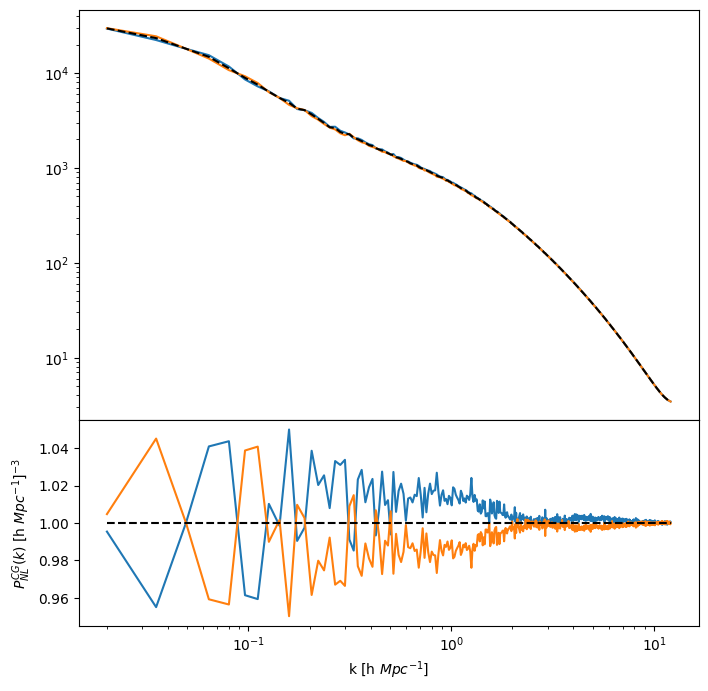

In [34]:
"""Plotting phase pair z = 0"""

fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,8),height_ratios=[2,1])
fig.subplots_adjust(hspace=0,wspace=0)

k, Pk_NL,Pk_Lin = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_8_cb_z0.000.txt").T
k, Pk_NL_pp,Pk_Lin_pp = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_phasepair_8_cb_z0.000.txt").T
ax[0].plot(k,Pk_NL)
ax[0].plot(k,Pk_NL_pp)
ax[0].plot(k,(Pk_NL+ Pk_NL_pp)/2, "k--")

ax[1].plot(k,Pk_NL/((Pk_NL+ Pk_NL_pp)/2))
ax[1].plot(k,Pk_NL_pp/((Pk_NL+ Pk_NL_pp)/2))
ax[1].plot(k,(Pk_NL+ Pk_NL_pp)/2/((Pk_NL+ Pk_NL_pp)/2), "k--")

ax[0].set_xscale("log")
ax[0].set_yscale("log")

plt.xlabel(r"k [h $Mpc^{-1}]$")
#plt.ylabel("$\dfrac{P_{NL}(k)}{P_{lin}(k)}$")
plt.ylabel("$P^{CG}_{NL}(k)$ [h $Mpc^{-1}]^{-3}$")

Text(0, 0.5, '$P^{CG}_{NL}(k)$ [h $Mpc^{-1}]^{-3}$')

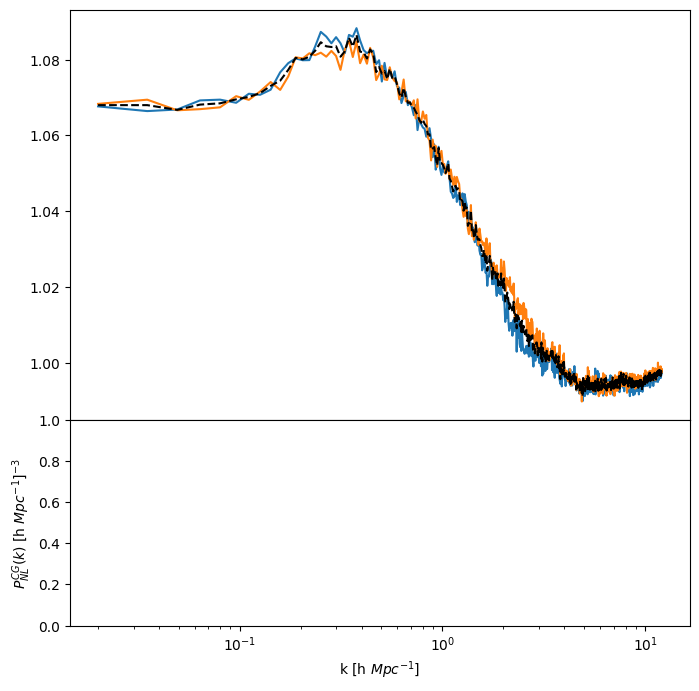

In [61]:
"""Plotting phase pair z = 0"""

fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,8),height_ratios=[2,1])
fig.subplots_adjust(hspace=0,wspace=0)

k, Pk_NL,Pk_Lin = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_8_cb_z0.000.txt").T
k, Pk_NL_pp,Pk_Lin_pp = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_phasepair_8_cb_z0.000.txt").T
k, Pk_NL_GR,Pk_Lin_GR = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_GR_8/pofk_my_new_Hi-COLA_simulation_GR_8_cb_z0.000.txt").T
k, Pk_NL_pp_GR,Pk_Lin_pp_GR = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_GR_8/pofk_my_new_Hi-COLA_simulation_GR_phasepair_8_cb_z0.000.txt").T

ax[0].plot(k,Pk_NL/Pk_NL_GR)
ax[0].plot(k,Pk_NL_pp/Pk_NL_pp_GR)
ax[0].plot(k,(Pk_NL+ Pk_NL_pp)/(Pk_NL_GR+ Pk_NL_pp_GR), "k--")


ax[0].set_xscale("log")
#ax[0].set_yscale("log")

plt.xlabel(r"k [h $Mpc^{-1}]$")
#plt.ylabel("$\dfrac{P_{NL}(k)}{P_{lin}(k)}$")
plt.ylabel("$P^{CG}_{NL}(k)$ [h $Mpc^{-1}]^{-3}$")

# Account for different growth at z=49 (initial conditions)

## From the frontend files (LH, final)

### Get expansion and force files

In [36]:
''' Define useful functions'''

''' Define useful functions'''

def Update_ini(run, sample, num_ini):
    """
    Updates file num_ini to include the parameters (numerical)
    """
    h = sample[3]
    wr = 4.28e-5
    wb = 0.02196
    wc = sample[0]*h**2 - wb    
    
    config_n = ConfigObj(num_ini)
    keys_n = config_n.keys()
    
    config_n[keys_n[0]] = 'run_'+str(run)
    
    config_n[keys_n[6]] = str(h)
    config_n[keys_n[7]] = str(wr)
    config_n[keys_n[8]] = str(wb)
    config_n[keys_n[9]] = str(wc)
    config_n.filename = '/home/c2042999/PCA_project/HiCOLA_files/numerical.ini'
    config_n.write()
    
def Update_ini(run, sample, horn_ini, num_ini):
    """
    Updates files num_ini and horn_ini to include the parameters (numerical and MG) from 
    f_phi and
    arr_num = h , wr , wb , wc, n_s , A_s
    """
    h = sample[3]
    wr = 4.28e-5
    wb = 0.02196
    wc = sample[0]*h**2 - wb    

    config_h = ConfigObj(horn_ini)

    f_phi = 0.0
    
    k1_track = 0.0

    keys_h = config_h.keys()
    
    config_h[keys_h[1]] = '/home/c2042999/PCA_project/HiCOLA_files/Growth_comparison_files'
    config_h[keys_h[0]] = 'horndeski_model'
    
    config_h[keys_h[2]] = 'k_1*X'
    config_h[keys_h[3]] = 'g_31*X'
    config_h[keys_h[4]] = '0.5'

    config_h[keys_h[7]] = str(k1_track)
    config_h[keys_h[8]] = str("1")
    config_h[keys_h[9]] = str(f_phi)
    config_h[keys_h[10]] = str("1")
    config_h[keys_h[11]] = str("1")
    config_h[keys_h[20]] = str("False")
    config_h[keys_h[22]] = str("1")
    
    ## Numerical params
    config_n = ConfigObj(num_ini)
    keys_n = config_n.keys()
    
    config_n[keys_n[0]] = 'run_'+str(run)

    
    config_n[keys_n[6]] = str(h)
    config_n[keys_n[7]] = str(wr)
    config_n[keys_n[8]] = str(wb)
    config_n[keys_n[9]] = str(wc)
    config_h.filename = '/home/c2042999/PCA_project/HiCOLA_files/horndeski_LCDM.ini'
    config_n.filename = '/home/c2042999/PCA_project/HiCOLA_files/numerical.ini'
    config_h.write(); config_n.write()

In [30]:
### Run frontend for all different .ini files

Update_ini(str('ESS-C'), sample_new, '/home/c2042999/HiCOLA_env/Cubic_galileon_emu-ICGweek/horndeski_parameters.ini', '/home/c2042999/HiCOLA_env/Cubic_galileon_emu-ICGweek/numerical_parameters.ini')
command = 'cd ; cd /home/c2042999/HiCOLA_env/Hi-COLA; python3 -m HiCOLA.Frontend.generate_simulation_input /home/c2042999/PCA_project/HiCOLA_files/horndeski_LCDM.ini /home/c2042999/PCA_project/HiCOLA_files/numerical.ini'
os.system(command)
    

/home/c2042999/PCA_env/3.8.10/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "
<lambdifygenerated-13>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 2.0*E**2.0*g_31*phiprime**3.0/((1.0 - 1.0*(1.0*E - 0.5*E**3.0*g_31*phiprime**3.0)/E)**2 - 1.0 + 1.0*(1.0*E - 0.5*E**3.0*g_31*phiprime**3.0)/E + 1.0*(-1.5*E**3.0*g_31*phiprime**2.0*phiprimeprime + Eprime*(-1.5*E**2.0*g_31*phiprime**3.0 + 1.0))/E - 0.5*(2.0*E*Eprime + 1.0*E**2.0*k_1*phiprime**2.0 - 1.0*E**3.0*g_31*phiprime**2.0*(E*phiprimeprime + Eprime*phiprime) + 3.0*E**4.0*g_31*phiprime**3.0)/E**2)
<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in scalar divide
  return (1.0 - 1.0*(1.0*E - 0.5*E**3.0*g_31*phiprime**3.0)/E)/((1.0 - 1.0*(1.0*E - 0.5*E**3.0*g_31*phiprime**3.0)/E)**2 - 1.0 + 1.0*(1.0*E - 0.5*E**3.0

Namespace(input_ini_filenames=['/home/c2042999/PCA_project/HiCOLA_files/horndeski_LCDM.ini', '/home/c2042999/PCA_project/HiCOLA_files/numerical.ini'])
Horndeski functions --------------
K = X*k_1
G_3 = X*g_31
G_4 = 0.500000000000000
Horndeski parameters--------------
horndeski_model model parameters, [k_1, g_31] = [0.0, 0.9]
Cosmological parameters-----------
Omega_m0 = 0.2797409788825341
Omega_r0 = 8.016144815327033e-05
Omega_lambda0 = 0.7201788596693127
Initial conditions----------------
Hubble0 = 1.0
scalar_prime0 = 1.0
Closure parameter is g_31 = -1.1102230246251565e-16
(note: therefore one of the initial conditions or Horndeski model parameters printed above was the guess value)
Files for Hi-COLA numerical simulation being generated.
 expansion: /home/c2042999/PCA_project/HiCOLA_files/Growth_comparison_files/horndeski_model_run_ESS-C_expansion_1.txt 
 force:/home/c2042999/PCA_project/HiCOLA_files/Growth_comparison_files/horndeski_model_run_ESS-C_force_1.txt
Files generated. Saved 

0

### Get the growth ratio

(0.0, 1.1)

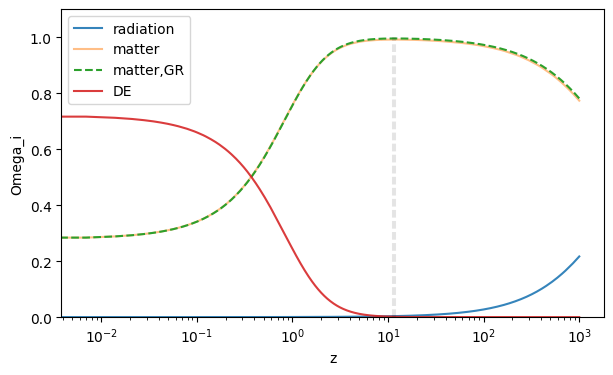

In [31]:
## Plotting ##

cmap = matplotlib.colormaps['viridis']

f_phi = sample_new[-1]

fig, ax = plt.subplots(1,1, figsize=(7,4),sharex=True)
fig.subplots_adjust(hspace=0,wspace=0)

mu_arr = []
Omega_m = []
E_CuGal = []
E_LCDM = []

z_matterdom = []
z_matterdom_gr = []

# We want Omega_m*h^2 , n_s    , A_s ,h,  f_phi

expansion_today = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Hi-COLA_Output/ESS-C_run_ESS-C_expansion.txt")

wr = wr_funct(T_CMB)
h = sample_new[3]
wm = sample_new[0]*h**2

a_today = expansion_today.T[0]
E_a_today = expansion_today.T[1]

E_a_GR = np.sqrt((wm)*a_today**(-3) + wr*a_today**(-4) + (h**2 - (wm) -wr))/h

Omega_m.append(wm/h**2)
E_CuGal.append(E_a_today)
E_LCDM.append(E_a_GR)

force_today = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Hi-COLA_Output/ESS-C_run_ESS-C_force.txt")

a_today = force_today.T[0]
coupling = force_today.T[2]

mu_arr.append(coupling + 1)
cmap = matplotlib.colormaps['Greens']
ax.plot(1/a_today -1, wr*a_today**(-4)/E_a_today**2/h**2, alpha=0.9)
cmap = matplotlib.colormaps['Blues']
ax.plot(1/a_today -1, wm*a_today**(-3)/E_a_today**2/h**2, alpha=0.5)

cmap = matplotlib.colormaps['Purples']
ax.plot(1/a_today -1, wm*a_today**(-3)/E_a_GR**2/h**2, alpha=1,linestyle="--")

cmap = matplotlib.colormaps['Reds']
ax.plot(1/a_today -1, ((h**2 - wm -wr)/E_a_today**2)/h**2, alpha=0.9)

z_matterdom.append((1/a_today -1)[np.argmax(wm*a_today**(-3)/E_a_today**2/h**2)])
z_matterdom_gr.append((1/a_today -1)[np.argmax(wm*a_today**(-3)/E_a_GR**2/h**2)])



ax.plot([z_matterdom,z_matterdom], [0,1], "k--", alpha=0.1)
ax.plot([z_matterdom_gr,z_matterdom_gr], [0,1], "k--", alpha=0.1)

ax.set_xlabel("z")

ax.legend(["radiation", "matter", "matter,GR", "DE"])
ax.set_ylabel(r"Omega_i")
ax.set_xscale("log")
ax.set_ylim(0,1.1)


In [12]:
def solverGrowth_mu(y,a,a_arr, mu_arr,E_arr,Omega_m):
    mu = CubicSpline(a_arr,mu_arr)(a)
    E_val = CubicSpline(a_arr,E_arr)(a)

    D , a3EdDda = y
    
    ydot = [a3EdDda / (E_val*a**3), 3*Omega_m*D*mu/(2*E_val*a**2)]
    return ydot


0.000999
1.0
0.000999


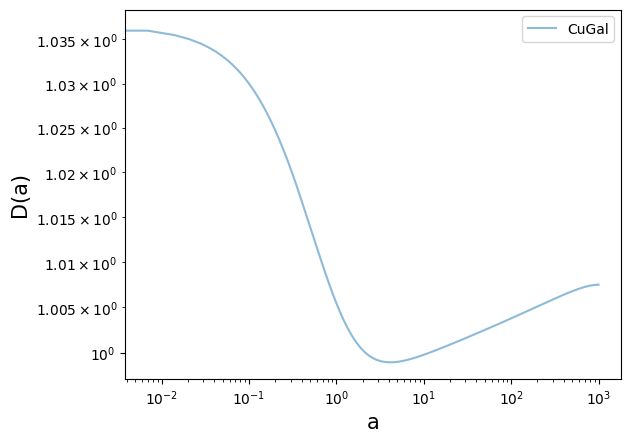

In [13]:
############### NEW VERSION ##################

ratio_growth_new = []


print(a_today[0])
print(a_today[-1])
print(np.min(a_today))


###############################################
expansion_today = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Hi-COLA_Output/ESS-C_run_ESS-C_expansion.txt")

wr = wr_funct(T_CMB)
h = sample_new[3]
wm = sample_new[0]*h**2

expansion_today_GR = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Growth_comparison_files/horndeski_model_run_ESS-C_expansion.txt")
E_a_GR = expansion_today_GR.T[1]

E_a_today = expansion_today.T[1]
E_a_GR_analytic = np.sqrt((wm)*a_today**(-3) + wr*a_today**(-4) + (h**2 - (wm) -wr))/h
E_a_today = savgol_filter(E_a_today/E_a_GR,100, 3) * E_a_GR_analytic

idx_matterdom = np.argmax(wm*a_today**(-3)/E_a_today**2/h**2)
idx_matterdom_gr = np.argmax(wm*a_today**(-3)/E_a_GR_analytic**2/h**2)

force_today = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Hi-COLA_Output/ESS-C_run_ESS-C_force.txt")

coupling = force_today.T[2]
mu = (coupling + 1)

Soln = odeint(solverGrowth_mu, [a_today[0], (E_a_today[0]*a_today[0]**3)], a_today, \
              args=(a_today, mu,E_a_today,wm/h**2), mxstep=int(1e4))

Delta = Soln.T[0]

Soln = odeint(solverGrowth_mu, [a_today[0], (E_a_GR_analytic[0]*a_today[0]**3)], a_today,\
              args=(a_today, np.ones(len(a_today)),E_a_GR_analytic,wm/h**2), mxstep=int(1e4))

Delta_GR = Soln.T[0]

D_a_norm = Delta / ((CubicSpline(a_today,Delta)(a_today[idx_matterdom])) / a_today[idx_matterdom])

D_a_norm_GR = Delta_GR / ((CubicSpline(a_today,Delta_GR)(a_today[idx_matterdom_gr])) / a_today[idx_matterdom_gr])

plt.semilogx(1/a_today - 1, D_a_norm/D_a_norm_GR, alpha= 0.5)

ratio_growth_new.append(D_a_norm/D_a_norm_GR)
#ratio_growth_new.append(D_a_norm[find_idxnearest(a_today, 0.02)]/D_a_norm_GR[find_idxnearest(a_today, 0.02)])

plt.xlabel("a", fontsize=15)
plt.ylabel("D(a)", fontsize=15)
plt.legend(["CuGal", "GR"])
#plt.xlim(1e-3,1e-2)
#plt.ylim(1e-3,3e-2)
plt.yscale("log")

/tmp/ipykernel_1089497/1538221208.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.3%}'.format(x) for x in vals])


Text(0, 0.5, '$z_i=49$')

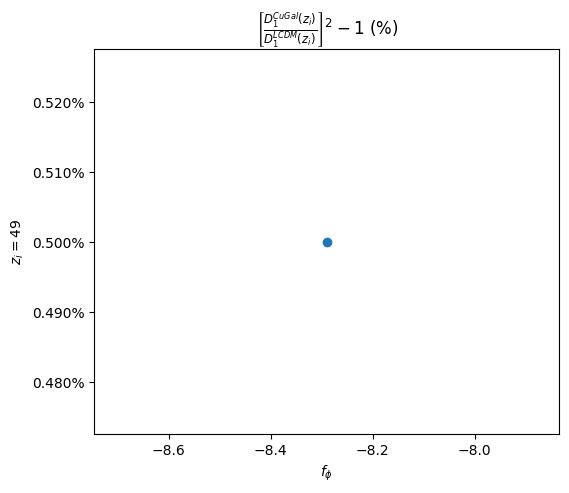

In [14]:
f, ax = plt.subplots(1,1, figsize=(6, 5), sharex=True)
fig.subplots_adjust(wspace=0)
idx = np.argmin(np.abs(a_today - 0.02))


ax.set_title(r"$\left[\frac{D_1^{CuGal}(z_i)}{D_1^{LCDM}(z_i)}\right]^2 - 1$ (%)")
ax.set_xlabel(r"$f_\phi$")

idx = np.argmin(np.abs(a_today - 0.02))
ax.scatter(f_phi, (np.array(ratio_growth_new).T[idx]**2 ) - 1)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.3%}'.format(x) for x in vals])
ax.set_ylabel(r"$z_i={}$".format(np.int(1/a_today[idx] - 1)))


In [38]:
print((np.array(ratio_growth_new).T[idx][np.argmax(np.array(ratio_growth_new).T[idx])])**2 - 1)

0.004999977514958731


# Create P(k) files

In [37]:
"""By the end of this cell, will have 
Boost = Boost(z, k)  --- WITH GROWTH FACTOR NORMALIZATION INCLUDED!
k = wavevector
z = redshift"""

Boost = np.zeros((51,768))

for i in range(1):

    # CG, no phase reverse
    c = 0
    for filename in glob.glob('/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_8_cb*', recursive=True):

        k, Pk_NL_j,Pk_Lin_j = np.loadtxt(filename).T
        
        if c == 0:
            Pk_NL = [Pk_NL_j]
            z = [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])]

        else:
            Pk_NL = np.append(Pk_NL, [Pk_NL_j], axis = 0)
            z = np.append(z, [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])], axis=0)
        c += 1
    # sort Pk from lowest to highest 
    Pk_NL = Pk_NL[z.argsort()]

    # CG, phase reverse
    c = 0
    for filename in glob.glob('/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_phasepair_8_cb*', recursive=True):

        k, Pk_NL_j,Pk_Lin_j = np.loadtxt(filename).T
        
        if c == 0:
            Pk_NL_pp = [Pk_NL_j]
            z = [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])]

        else:
            Pk_NL_pp = np.append(Pk_NL_pp, [Pk_NL_j], axis = 0)
            z = np.append(z, [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])], axis=0)
        c += 1
    # sort Pk from lowest to highest 
    Pk_NL_pp = Pk_NL_pp[z.argsort()]
    
    # GR, no phase reverse
    c = 0
    for filename in glob.glob('/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_GR_8/pofk_my_new_Hi-COLA_simulation_GR_8_cb*', recursive=True):
        
        k, Pk_NL_GR_j,Pk_Lin_GR_j = np.loadtxt(filename).T
        
        
        if c == 0:
            Pk_NL_GR = [Pk_NL_GR_j]
            z = [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])]

        else:
            Pk_NL_GR = np.append(Pk_NL_GR, [Pk_NL_GR_j], axis = 0)
            z = np.append(z, [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])], axis=0)
        c += 1
    # sort Pk from lowest to highest 
    Pk_NL_GR = Pk_NL_GR[z.argsort()]

    # GR, phase reverse
    c = 0
    for filename in glob.glob('/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_GR_8/pofk_my_new_Hi-COLA_simulation_GR_phasepair_8_cb*', recursive=True):
        
        k, Pk_NL_GR_j,Pk_Lin_GR_j = np.loadtxt(filename).T
        
        
        if c == 0:
            Pk_NL_GR_pp = [Pk_NL_GR_j]
            z = [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])]

        else:
            Pk_NL_GR_pp = np.append(Pk_NL_GR_pp, [Pk_NL_GR_j], axis = 0)
            z = np.append(z, [float(filename.split("z",1)[1].split(".",2)[0] + "." + filename.split("z",1)[1].split(".",2)[1])], axis=0)
        c += 1
    # sort Pk from lowest to highest 
    Pk_NL_GR_pp = Pk_NL_GR_pp[z.argsort()]

    Boost = ((Pk_NL+ Pk_NL_pp)/(Pk_NL_GR + Pk_NL_GR_pp)) * np.array(ratio_growth_new).T[np.argmin(np.abs(a_today - 0.02))]**2

z = sorted(z)

In [39]:
print(['%.3f' % i for i in z])
print(len(z))

['0.000', '0.020', '0.041', '0.062', '0.085', '0.109', '0.133', '0.159', '0.186', '0.214', '0.244', '0.275', '0.308', '0.342', '0.378', '0.416', '0.457', '0.500', '0.545', '0.593', '0.645', '0.700', '0.758', '0.821', '0.888', '0.961', '1.039', '1.124', '1.216', '1.317', '1.427', '1.548', '1.682', '1.831', '1.998', '2.185', '2.397', '2.639', '2.918', '3.244', '3.630', '4.092', '4.656', '5.361', '6.267', '7.475', '9.163', '11.690', '15.892', '24.253', '49.000']
51


Text(0, 0.5, '$B(k, z)$ ESS-C')

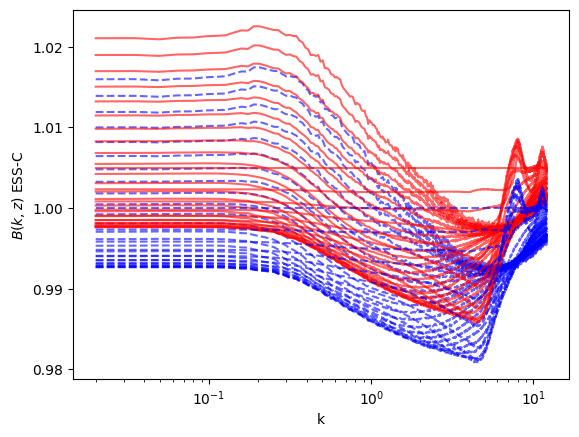

In [63]:
"""Plotting the Boost for the simulations at z = 0"""

for i in range(31):
    i = i+20
    k, Pk_NL,Pk_Lin = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_8_cb_z{}.txt".format(['%.3f' % i for i in z][i])).T
    k, Pk_NL_pp,Pk_Lin_pp = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_8/pofk_my_new_Hi-COLA_simulation_ESS-C_phasepair_8_cb_z{}.txt".format(['%.3f' % i for i in z][i])).T
    
    k, Pk_NL_GR,Pk_Lin_GR = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_GR_8/pofk_my_new_Hi-COLA_simulation_GR_8_cb_z{}.txt".format(['%.3f' % i for i in z][i])).T
    k, Pk_NL_GR_pp,Pk_Lin_GR_pp = np.loadtxt("/home/c2042999/PCA_project/HiCOLA_files/Output_backend/COLA_GR_8/pofk_my_new_Hi-COLA_simulation_GR_phasepair_8_cb_z{}.txt".format(['%.3f' % i for i in z][i])).T
    
    Boost_plot = ((Pk_NL+ Pk_NL_pp)/(Pk_NL_GR+ Pk_NL_GR_pp))
    plt.plot(k,Boost[i,:], "r", alpha=0.6)

    plt.plot(k,Boost_plot,"b--", alpha=0.6)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("$B(k, z)$ ESS-C")

Text(0, 0.5, '$B(k$ h/Mpc $, z)$')

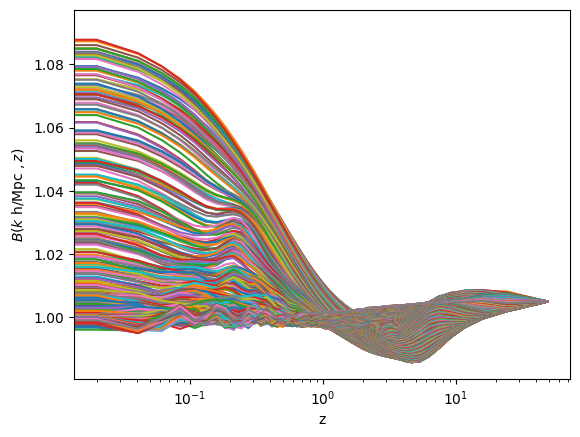

In [44]:
"""Plotting the Boost for the simulations at different z"""

for i in range(len(k)):
    plt.plot(z,Boost[:,i])

plt.xscale("log")
plt.xlabel("z")
plt.ylabel("$B(k$ h/Mpc $, z)$")

In [64]:
"""Saving the Boost to a binary .npy file
Create a file B(z,k)"""

np.save(r'/home/c2042999/PCA_project/HiCOLA_files/Output/Boost.npy', Boost)

# Load the saved array
arr_loaded = np.load('/home/c2042999/PCA_project/HiCOLA_files/Output/Boost.npy')
print(arr_loaded.shape)

(51, 768)


In [65]:
"""Saving z and k"""

df_zk = pd.DataFrame([z,list(k)]).T
df_zk.columns = ["# z", "k (h/Mpc)"]
#export DataFrame to text file
with open(r'/home/c2042999/PCA_project/HiCOLA_files/Output/z_k.txt', 'w') as f:
    df_string = df_zk.to_string(header=True, index=False)
    f.write(df_string)